<a href="https://colab.research.google.com/github/gtmray/Titanic-Classification-Test/blob/master/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
try:
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
    from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import confusion_matrix, log_loss, accuracy_score
    from sklearn.svm import SVC, LinearSVC, NuSVC
    from sklearn.model_selection import GridSearchCV
    from sklearn.model_selection import cross_val_score
    from sklearn.naive_bayes import GaussianNB
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
    from scipy.stats import pearsonr
    from sklearn.preprocessing import StandardScaler
    sns.set()
except ImportError:
    print('IMPORT ERROR: You have not downloaded the required packages yet!')
    print('You can try "Pip install framework_name" to install the package! THANKS :)')

In [0]:
df1 = pd.read_csv('/content/sample_data/test.csv')
df2 = pd.read_csv('/content/sample_data/gender_submission.csv')
df_test = pd.merge(df1, df2, on='PassengerId')

In [58]:
df_test.drop(['Cabin', 'Name'], axis=1, inplace=True)
df_test.dropna(inplace=True)
df_test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
0,892,3,male,34.5,0,0,330911,7.8292,Q,0
1,893,3,female,47.0,1,0,363272,7.0000,S,1
2,894,2,male,62.0,0,0,240276,9.6875,Q,0
3,895,3,male,27.0,0,0,315154,8.6625,S,0
4,896,3,female,22.0,1,1,3101298,12.2875,S,1
...,...,...,...,...,...,...,...,...,...,...
409,1301,3,female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,S,1
411,1303,1,female,37.0,1,0,19928,90.0000,Q,1
412,1304,3,female,28.0,0,0,347086,7.7750,S,1
414,1306,1,female,39.0,0,0,PC 17758,108.9000,C,1


In [59]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331 entries, 0 to 415
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  331 non-null    int64  
 1   Pclass       331 non-null    int64  
 2   Sex          331 non-null    object 
 3   Age          331 non-null    float64
 4   SibSp        331 non-null    int64  
 5   Parch        331 non-null    int64  
 6   Ticket       331 non-null    object 
 7   Fare         331 non-null    float64
 8   Embarked     331 non-null    object 
 9   Survived     331 non-null    int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 28.4+ KB


In [60]:
df_test[['PassengerId', 'Sex', 'Embarked', 'Pclass', 'Survived']] = \
    df_test[['PassengerId', 'Sex', 'Embarked', 'Pclass', 'Survived']].astype('category')
df_test[['SibSp', 'Parch', 'Age']] = df_test[['SibSp', 'Parch', 'Age']].astype('int8')
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331 entries, 0 to 415
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  331 non-null    category
 1   Pclass       331 non-null    category
 2   Sex          331 non-null    category
 3   Age          331 non-null    int8    
 4   SibSp        331 non-null    int8    
 5   Parch        331 non-null    int8    
 6   Ticket       331 non-null    object  
 7   Fare         331 non-null    float64 
 8   Embarked     331 non-null    category
 9   Survived     331 non-null    category
dtypes: category(5), float64(1), int8(3), object(1)
memory usage: 23.6+ KB


In [61]:
y_test = df_test['Survived']
x11 = df_test.drop('Survived', axis=1)
dum = pd.get_dummies(x11[['Pclass', 'Sex']], drop_first=False)
x11 = pd.concat([x11, dum], axis=1)
x11.drop(['Pclass', 'Sex'], axis=1, inplace=True)
x11.reset_index(drop=True, inplace=True)
x_test = x11.drop(['PassengerId', 'Ticket', 'Embarked'], axis=1)
x_test

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
0,34,0,0,7.8292,0,0,1,0,1
1,47,1,0,7.0000,0,0,1,1,0
2,62,0,0,9.6875,0,1,0,0,1
3,27,0,0,8.6625,0,0,1,0,1
4,22,1,1,12.2875,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...
326,3,1,1,13.7750,0,0,1,1,0
327,37,1,0,90.0000,1,0,0,1,0
328,28,0,0,7.7750,0,0,1,1,0
329,39,0,0,108.9000,1,0,0,1,0


In [62]:
df = pd.read_csv('/content/sample_data/train.csv')
df.drop(['Cabin', 'Name'], axis=1, inplace=True)
df.dropna(inplace=True)
df[['PassengerId', 'Sex', 'Embarked', 'Pclass']] = df[['PassengerId', 'Sex', 'Embarked', 'Pclass']]\
                                            .astype('category')
df[['SibSp', 'Parch', 'Age']] = df[['SibSp', 'Parch', 'Age']].astype('int8')
#print(df.Age.unique())
#['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
#       'Fare', 'Embarked']
y = df['Survived']
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,male,22,1,0,A/5 21171,7.2500,S
1,2,1,1,female,38,1,0,PC 17599,71.2833,C
2,3,1,3,female,26,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,female,35,1,0,113803,53.1000,S
4,5,0,3,male,35,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,female,39,0,5,382652,29.1250,Q
886,887,0,2,male,27,0,0,211536,13.0000,S
887,888,1,1,female,19,0,0,112053,30.0000,S
889,890,1,1,male,26,0,0,111369,30.0000,C


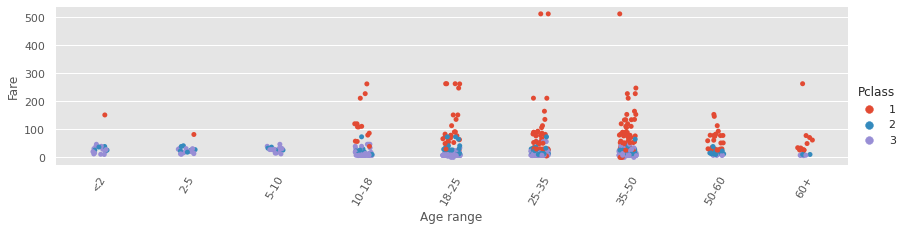

In [65]:
df_plot = df.copy()
bins = [0, 2, 5, 10, 18, 25, 35, 50, 60, np.inf]
labels = ['<2', '2-5', '5-10', '10-18', '18-25', '25-35', '35-50', '50-60', '60+']
df_plot['Age range'] = pd.cut(df_plot.Age, bins=bins, labels=labels)
age_plot = sns.catplot('Age range', 'Fare', data=df_plot, aspect=4, height=3, hue='Pclass')
#age_plot = sns.catplot('Age range', data=df_plot, kind='count', aspect=3, height=3)
age_plot.set_xticklabels(rotation=60)
plt.style.use('ggplot')
plt.show()

In [0]:
x1 = df.drop('Survived', axis=1)
dum = pd.get_dummies(x1[['Pclass', 'Sex']], drop_first=False)
x1 = pd.concat([x1, dum], axis=1)
x1.drop(['Pclass', 'Sex'], axis=1, inplace=True)
x1.reset_index(drop=True, inplace=True)
x = x1.drop(['PassengerId', 'Ticket', 'Embarked'], axis=1)

# scalar = StandardScaler()
# x = scalar.fit_transform(x)
y = y.astype('category')

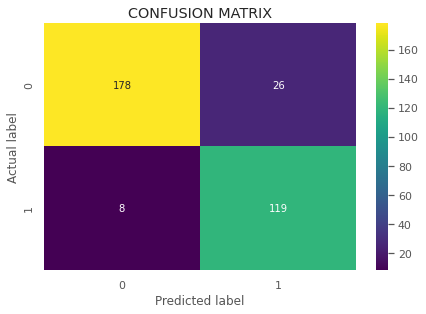

In [22]:
plt.style.use('ggplot')
ada = AdaBoostClassifier()
ada.fit(x, y)
y_pred = ada.predict(x_test)
confuse = confusion_matrix(y_test, y_pred)
sns.heatmap(pd.DataFrame(confuse), annot=True, cmap='viridis', fmt='g')
plt.tight_layout()
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.title('CONFUSION MATRIX')
plt.show()

In [32]:
knn = KNeighborsClassifier()
cv_scores = cross_val_score(knn, x, y, cv=5)
print('The cross validation scores for Knn classifier are: {}'.format(cv_scores))
param_grid = {'n_neighbors': np.arange(1, 100)}
gscv_knn = GridSearchCV(knn, param_grid, cv=5)
gscv_knn.fit(x, y)
print('The best suitable K is :{0} and the best score is: {1}'.
      format(gscv_knn.best_params_, gscv_knn.best_score_))

The cross validation scores for Knn classifier are: [0.61538462 0.66433566 0.70422535 0.69014085 0.75352113]
The best suitable K is :{'n_neighbors': 22} and the best score is: 0.713582192455432


In [0]:
def classification_technique(x_train, y_train,x_test,y_test):
        list_of_models = [LinearDiscriminantAnalysis(), GaussianNB(),
                          KNeighborsClassifier(), SVC(), LinearSVC(dual=False), NuSVC(),
                          RandomForestClassifier(), LogisticRegression(max_iter=1000), DecisionTreeClassifier(),
                          ExtraTreeClassifier(), AdaBoostClassifier(), GradientBoostingClassifier()]
        name_of_models = ['LDA', 'GaussianNB', 'KNN', 'SVC', 'LinearSVC', 'NuSVC', 'Random Forest',
                          'Logistic Regression', 'Decision Tree', 'Extra Tree', 'AdaBoost', 'Gradient Boosting']
        score = []
        cv = []
        accuracy = []
        logloss = []
        for model in list_of_models:
            model.fit(x_train, y_train)
            cv_scores = cross_val_score(model, x_train, y_train, cv=5)
            cv.append(cv_scores.mean())
            y_pred = model.predict(x_test)
            score.append(model.score(x_test, y_test))
            accuracy.append(accuracy_score(y_test, y_pred))
            logloss.append(log_loss(y_test, y_pred))
        df_show_score = pd.DataFrame({'Score': score, 'CV Score': cv, 'Accuracy': accuracy,
                                      'Log loss': logloss}, index=name_of_models)
        fig = plt.figure()
        #ax = fig.add_subplot(111)
        #ax2 = fig.add_subplot(211)
        #fig.subplots_adjust(wspace=1, hspace=1)
        ax1 = sns.barplot('Score', df_show_score.index, data=df_show_score, color='green')
        ax2 = sns.barplot('CV Score', df_show_score.index, data=df_show_score, color='blue', saturation=0.3)
        
        #plt.tight_layout(w_pad=5)
        #sns.distplot(df_show_score['Score'], color='red', bins=12)
        #sns.distplot(df_show_score['CV Score'], color='green', bins=12)
        plt.show()
        return df_show_score

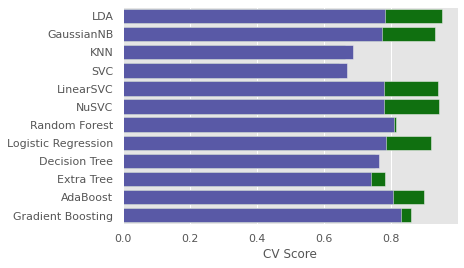

                        Score  CV Score  Accuracy   Log loss
LDA                  0.951662  0.782261  0.951662   1.669572
GaussianNB           0.930514  0.773899  0.930514   2.400026
KNN                  0.661631  0.685522  0.661631  11.686984
SVC                  0.643505  0.670029  0.643505  12.312997
LinearSVC            0.939577  0.779464  0.939577   2.086969
NuSVC                0.942598  0.779474  0.942598   1.982629
Random Forest        0.815710  0.807653  0.815710   6.365229
Logistic Regression  0.918429  0.786497  0.918429   2.817403
Decision Tree        0.752266  0.764070  0.752266   8.556550
Extra Tree           0.782477  0.741623  0.782477   7.513053
AdaBoost             0.897281  0.806244  0.897281   3.547853
Gradient Boosting    0.861027  0.828691  0.861027   4.799992


In [52]:
plt.style.use('ggplot')
returned_df = classification_technique(x, y, x_test, y_test)
print(returned_df)
